# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### *Our goals today are to be able to*: <br/>

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [6]:
!pwd
!ls -al

/Users/enkeboll/code/fis/dc-ds-021720/mod-1/day-5-most-pandas
total 56
drwxr-xr-x   7 enkeboll  staff    224 Feb 24 11:27 .
drwxr-xr-x  10 enkeboll  staff    320 Feb 24 11:00 ..
-rw-r--r--@  1 enkeboll  staff   6148 Feb 24 11:01 .DS_Store
drwxr-xr-x   3 enkeboll  staff     96 Feb 24 11:03 .ipynb_checkpoints
drwxr-xr-x   5 enkeboll  staff    160 Nov 26 11:20 data
drwxr-xr-x   3 enkeboll  staff     96 Feb 24 11:01 images
-rw-r--r--   1 enkeboll  staff  18553 Feb 24 11:27 manipulating_data_with_pandas.ipynb


In [3]:
import pandas as pd
uci = pd.read_csv('data/heart.csv')

In [5]:
!head -n5 data/heart.csv

In [7]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [8]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
uci.shape

(303, 14)

#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [10]:
# Call the .info() method on our dataset. What do you observe?

uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
uci.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# Call the .describe() method on our dataset. What do you observe?

uci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
# Use the code below. How does the output differ from info() ?
uci.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [16]:
uci.ca.mean()

0.7293729372937293

In [20]:
uci.oldpeak.count()

303

#### The Axis Variable

In [25]:
uci.mean(axis=1) # Try [shift] + [tab] here!

0      42.878571
1      43.892857
2      39.600000
3      42.771429
4      50.114286
         ...    
298    40.514286
299    40.085714
300    39.885714
301    31.585714
302    43.000000
Length: 303, dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

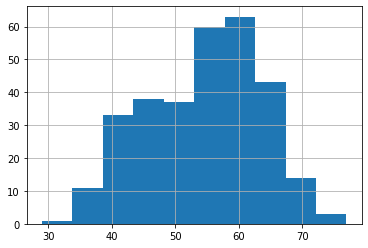

In [43]:
%matplotlib inline
uci['age'].hist()

In [46]:
# Your code here!
uci['age'].unique()

In [57]:
import numpy as np
np.sort(uci.age.unique())[::-1]

array([77, 76, 74, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58,
       57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41,
       40, 39, 38, 37, 35, 34, 29])

In [59]:
'abcd'[::-1]

'dcba'

In [45]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [60]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [62]:
animal_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115746 entries, 0 to 115745
Data columns (total 12 columns):
Animal ID           115746 non-null object
Name                79484 non-null object
DateTime            115746 non-null object
MonthYear           115746 non-null object
Date of Birth       115746 non-null object
Outcome Type        115739 non-null object
Outcome Subtype     52306 non-null object
Animal Type         115746 non-null object
Sex upon Outcome    115743 non-null object
Age upon Outcome    115716 non-null object
Breed               115746 non-null object
Color               115746 non-null object
dtypes: object(12)
memory usage: 10.6+ MB


In [63]:
animal_outcomes.isna().sum()

Animal ID               0
Name                36262
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type            7
Outcome Subtype     63440
Animal Type             0
Sex upon Outcome        3
Age upon Outcome       30
Breed                   0
Color                   0
dtype: int64

In [64]:
animal_outcomes.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,115746,79484,115746,115746,115746,115739,52306,115746,115743,115716,115746,115746
unique,103542,18697,95297,95297,6725,9,22,5,5,50,2549,584
top,A721033,Max,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,517,39,39,119,51015,28746,65727,40686,20848,30669,12149


What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [65]:
animal_outcomes.Breed.value_counts().head(5)

Domestic Shorthair Mix     30669
Pit Bull Mix                8246
Labrador Retriever Mix      6560
Chihuahua Shorthair Mix     6136
Domestic Shorthair          4843
Name: Breed, dtype: int64

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [83]:
list(map(successor, [1,2,3]))

[2, 3, 4]

In [86]:
def successor(x):
    try:
        return x + 1
    except TypeError as e:
        return x + 'y'


In [87]:
uci.applymap(successor).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,2,4,146,234,2,1,151,1,3.3,1,1,2,2
1,38,2,3,131,251,1,2,188,1,4.5,1,1,3,2
2,42,1,2,131,205,1,1,173,1,2.4,3,1,3,2
3,57,2,2,121,237,1,2,179,1,1.8,3,1,3,2
4,58,1,1,121,355,1,2,164,2,1.6,3,1,3,2


In [90]:
animal_outcomes.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [88]:
animal_outcomes.applymap(successor)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011y,Chunky,05/08/2019 06:20:00 PMy,05/08/2019 06:20:00 PMy,05/02/2017y,Rto-Adopty,NaN,Caty,Neutered Maley,2 yearsy,Domestic Shorthair Mixy,Brown Tabby/Whitey
1,A776359y,Gizmoy,07/18/2018 04:02:00 PMy,07/18/2018 04:02:00 PMy,07/12/2017y,Adoptiony,NaN,Dogy,Neutered Maley,1 yeary,Chihuahua Shorthair Mixy,White/Browny
2,A720371y,Moosey,02/13/2016 05:59:00 PMy,02/13/2016 05:59:00 PMy,10/08/2015y,Adoptiony,NaN,Dogy,Neutered Maley,4 monthsy,Anatol Shepherd/Labrador Retrievery,Buffy
3,A674754y,NaN,03/18/2014 11:47:00 AMy,03/18/2014 11:47:00 AMy,03/12/2014y,Transfery,Partnery,Caty,Intact Maley,6 daysy,Domestic Shorthair Mixy,Orange Tabbyy
4,A689724y,*Donatelloy,10/18/2014 06:52:00 PMy,10/18/2014 06:52:00 PMy,08/01/2014y,Adoptiony,NaN,Caty,Neutered Maley,2 monthsy,Domestic Shorthair Mixy,Blacky
...,...,...,...,...,...,...,...,...,...,...,...,...
115741,A814049y,NaN,02/23/2020 06:26:00 PMy,02/23/2020 06:26:00 PMy,02/23/2018y,Euthanasiay,Rabies Risky,Othery,Unknowny,NaN,Baty,Black/Browny
115742,A797767y,Canelloy,02/23/2020 07:10:00 PMy,02/23/2020 07:10:00 PMy,06/17/2018y,Return to Ownery,NaN,Dogy,Neutered Maley,1 yeary,Labrador Retriever/Plott Houndy,Brown/Blacky
115743,A813718y,Keanuy,02/23/2020 06:08:00 PMy,02/23/2020 06:08:00 PMy,06/16/2019y,Adoptiony,NaN,Caty,Neutered Maley,8 monthsy,Domestic Shorthairy,White/Orange Tabbyy
115744,A798419y,Yogiy,02/23/2020 07:10:00 PMy,02/23/2020 07:10:00 PMy,09/25/2018y,Return to Ownery,NaN,Dogy,Intact Maley,1 yeary,Labrador Retrievery,Black/Whitey


The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [74]:
uci['age'].apply(successor)

0      64
1      38
2      42
3      57
4      58
       ..
298    58
299    46
300    69
301    58
302    58
Name: age, Length: 303, dtype: int64

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [ ]:
def anon_function(x):
    return round(x)

In [94]:
def my_func(x): return round(x)

In [103]:
uci.describe().applymap(lambda joe: round(joe, 2))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [95]:
uci['oldpeak'].apply(my_func)[:10]

0    2
1    4
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    2
Name: oldpeak, dtype: int64

In [93]:
uci.oldpeak.apply(round).head(10)

0    2
1    4
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    2
Name: oldpeak, dtype: int64

Exercise: Use an anonymous function to turn the entries in age to strings

In [104]:
uci.age.map(lambda x: str(x))

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: object

In [105]:
uci.age.astype(str)

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: object

### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [ ]:
# Your code here

## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [110]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [111]:
uci.groupby('sex').groups

{0: Int64Index([  2,   4,   6,  11,  14,  15,  16,  17,  19,  25,  28,  30,  35,
              36,  38,  39,  40,  43,  48,  49,  50,  53,  54,  59,  60,  65,
              67,  69,  74,  75,  82,  84,  85,  88,  89,  93,  94,  96, 102,
             105, 107, 108, 109, 110, 112, 115, 118, 119, 120, 122, 123, 124,
             125, 127, 128, 129, 130, 131, 134, 135, 136, 140, 142, 143, 144,
             146, 147, 151, 153, 154, 155, 161, 167, 181, 182, 190, 204, 207,
             213, 215, 216, 220, 223, 241, 246, 252, 258, 260, 263, 266, 278,
             289, 292, 296, 298, 302],
            dtype='int64'),
 1: Int64Index([  0,   1,   3,   5,   7,   8,   9,  10,  12,  13,
             ...
             288, 290, 291, 293, 294, 295, 297, 299, 300, 301],
            dtype='int64', length=207)}

In [112]:
uci.groupby('sex').get_group(0) # .tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


### Aggregating

In [113]:
uci.groupby('sex').std()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,9.409396,0.972427,19.311119,65.088946,0.332455,0.557150,20.047969,0.422503,1.119844,0.593736,0.881026,0.441290,0.435286
1,8.883803,1.059064,16.658246,42.782392,0.366955,0.510754,24.130882,0.484505,1.174632,0.627378,1.074082,0.659949,0.498626


Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [ ]:
# Your code here

## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [ ]:
uci.pivot(values='sex', columns='target').head()

### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [106]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns=['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns=['age', 'HP'])

In [114]:
toy1.join(toy2.set_index('age'),
          on='age',
          lsuffix='_A',
          rsuffix='_B').head()

,age,HP_A,HP_B
0,63,142,100
1,33,47,200


### `.merge()`

In [107]:
ds_chars = pd.read_csv('data/ds_chars.csv', index_col=0)

In [115]:
states = pd.read_csv('data/states.csv', index_col=0)

In [116]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='inner')

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [117]:
pd.concat([ds_chars, states])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,HP,capital,home_state,name,nickname,state
0,200.0,NaN,WA,greg,NaN,NaN
1,200.0,NaN,WA,miles,NaN,NaN
2,170.0,NaN,TX,alan,NaN,NaN
3,300.0,NaN,DC,alison,NaN,NaN
4,200.0,NaN,TX,rachel,NaN,NaN
0,NaN,Olympia,NaN,NaN,evergreen,WA
1,NaN,Austin,NaN,NaN,alamo,TX
2,NaN,Washington,NaN,NaN,district,DC
3,NaN,Columbus,NaN,NaN,buckeye,OH
4,NaN,Salem,NaN,NaN,beaver,OR


### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [108]:
ds_chars.head()

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [109]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

,name,variable,value
0,greg,HP,200
1,miles,HP,200
2,alan,HP,170
3,alison,HP,300
4,rachel,HP,200
5,greg,home_state,WA
6,miles,home_state,WA
7,alan,home_state,TX
8,alison,home_state,DC
9,rachel,home_state,TX


## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here